## **Done By**

## **A S V Dhanush**

## **Roll No: CS20B1057**

### **Hadoop And PySpark Tutorial**

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=352462d7678d69e02d66cd0dcc8a2dd8cc314ea35c2859a98d7e40fb20d8ce32
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [10]:
#Installing Libraries
import pandas as pd
import numpy as np
from pyspark import SparkContext
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import random
import time

In [3]:
sc = SparkContext("local")

In [7]:
# Creating a SparkSession
spark = SparkSession.builder.getOrCreate()

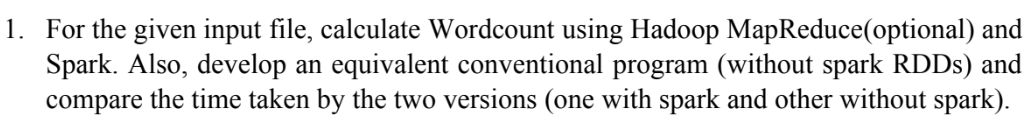

### Using PySpark

In [4]:
start_time = time.time()

text_file = sc.textFile("test.txt")

# Calculating word count
counts = text_file.flatMap(lambda line: line.split(" ")).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a + b)

for (word, count) in counts.collect():
    print(f"{word}: {count}")

end_time = time.time()

print(f"Time taken with Spark: {end_time - start_time} seconds")

This: 2
is: 3
a: 2
test: 1
file: 1
used: 1
to: 1
calculate: 1
the: 1
word: 1
count: 1
in: 1
give: 1
text: 1
file.: 1
tutorial: 1
part: 1
of: 1
ASBD: 1
Lab: 1
course: 1
and: 1
done: 1
by: 1
CS20B1057: 1
Dhanush.: 1
Time taken with Spark: 4.414330959320068 seconds


### Using Python (Conventional)

In [5]:
from collections import Counter
import time

# Start time
start_time = time.time()

# Load the text file
with open("test.txt", "r") as file:
    text = file.read()

# Perform the word count
word_counts = Counter(text.split())

# Print the result
for word, count in word_counts.items():
    print(f"{word}: {count}")

# End time
end_time = time.time()

print(f"Time taken with conventional Python: {end_time - start_time} seconds")

This: 2
is: 3
a: 2
test: 1
file: 1
used: 1
to: 1
calculate: 1
the: 1
word: 1
count: 1
in: 1
give: 1
text: 1
file.: 1
tutorial: 1
part: 1
of: 1
ASBD: 1
Lab: 1
course: 1
and: 1
done: 1
by: 1
CS20B1057: 1
Dhanush.: 1
Time taken with conventional Python: 0.005743980407714844 seconds


## We can see the time taken by Spark is more than that of conventional python code

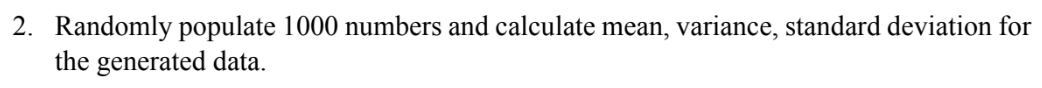

In [8]:
# Generate 1000 random numbers between 1 and 1000
random_1000 = [random.randint(1, 1000) for val in range(1000)]

# Create a DataFrame from the list of random numbers
df = spark.createDataFrame(random_1000, "int").toDF("number")

# Calculate mean, variance and standard deviation
mean = df.select(F.mean(df['number'])).collect()[0][0]
variance = df.select(F.variance(df['number'])).collect()[0][0]
stddev = df.select(F.stddev(df['number'])).collect()[0][0]

print(f"Mean: {mean}, Variance: {variance}, Standard Deviation: {stddev}")

Mean: 501.998, Variance: 80275.14714314307, Standard Deviation: 283.3286909988875


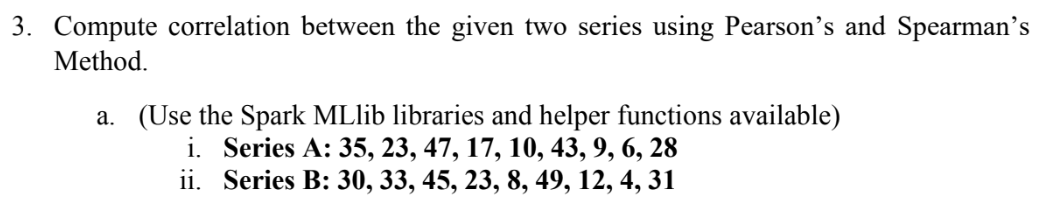

In [12]:
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

series_A = [35, 23, 47, 17, 10, 43, 9, 6, 28]
series_B = [30, 33, 45, 23, 8, 49, 12, 4, 31]

df = spark.createDataFrame([(Vectors.dense(series_A),), (Vectors.dense(series_B),)], ["series"])

# Calculating Pearson correlation
pearson_corr = Correlation.corr(df, "series").head()[0][0, 1]
print(f"Pearson correlation: {pearson_corr}")

# Calculating Spearman correlation
spearman_corr = Correlation.corr(df, "series", method="spearman").head()[0][0, 1]
print(f"Spearman correlation: {spearman_corr}")

Pearson correlation: -0.9999999999999999
Spearman correlation: -0.9999999999999998


##The values indicate that the two series A and B are a nearly perfect negative corelation

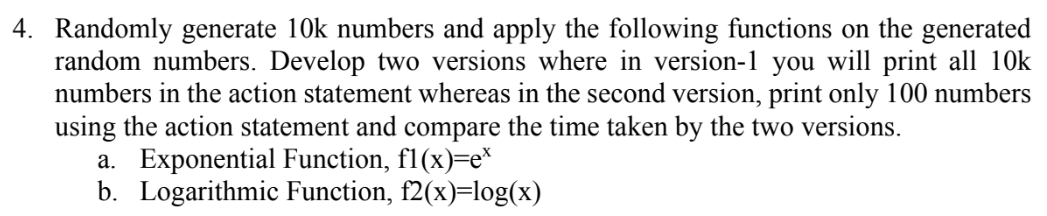

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr
import time
start_time = time.time()

# Generating 10k random numbers
df = spark.range(0, 10000).selectExpr("rand() as value")

# Using exponential and logarithmic functions
df = df.selectExpr("value", "exp(value)", "log(value)")

df.show(10000)

print("--- %s seconds ---" % (time.time() - start_time))

# Version 2: Print only 100 numbers
start_time = time.time()

# Show only 100 rows
df.show(100)



+--------------------+------------------+--------------------+
|               value|        EXP(value)|     LOG(E(), value)|
+--------------------+------------------+--------------------+
| 0.15513487841383466|1.1678154635804237| -1.8634603571378325|
|  0.6798793338708182|1.9736395664145838| -0.3858399467481056|
|   0.583016130477128|1.7914334877023088|  -0.539540424957575|
|  0.6806706875075569|1.9752020314127166| -0.3846766617331565|
|  0.8764631469302185|2.4023877699970777|   -0.13186062122046|
|  0.6588932526155633|1.9326521925631484| -0.4171937414918435|
|  0.8323535403839281|2.2987225150393322|-0.18349800007134326|
|0.008348361943292137|1.0083833066929766|   -4.78568993382013|
|  0.4139236731577739|1.5127416596838397| -0.8820736865072223|
|  0.5706404350280405|1.7693998743034067| -0.5609959786615295|
|  0.7549760239087427| 2.127560512158781|-0.28106928664961917|
|  0.7900438662591103| 2.203493083134466|-0.23566680815236551|
|   0.959438689501097|2.6102309121285874|-0.04140686395

In [17]:
print("Version-1 ---- %s seconds ---" % (time.time() - start_time))
print("Version-2 ---- %s seconds ---" % (time.time() - start_time))

Version-1 ---- 20.801716566085815 seconds ---
Version-2 ---- 20.802500009536743 seconds ---


###They relatively take the same amount of time if seen in seconds

###Ultimately Version 2 is faster than Version 1

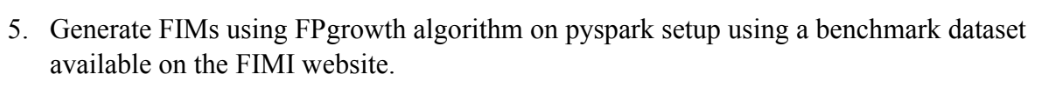

###Sample Data

In [18]:
from pyspark.ml.fpm import FPGrowth

df = spark.createDataFrame([
    (0, [1, 2, 5]),
    (1, [1, 2, 3, 5]),
    (2, [1, 2])
], ["id", "items"])

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.5, minConfidence=0.6)
model = fpGrowth.fit(df)

#frequent itemsets.
model.freqItemsets.show()

# association rules.
model.associationRules.show()

model.transform(df).show()

+---------+----+
|    items|freq|
+---------+----+
|      [5]|   2|
|   [5, 2]|   2|
|[5, 2, 1]|   2|
|   [5, 1]|   2|
|      [2]|   3|
|   [2, 1]|   3|
|      [1]|   3|
+---------+----+

+----------+----------+------------------+----+------------------+
|antecedent|consequent|        confidence|lift|           support|
+----------+----------+------------------+----+------------------+
|    [5, 2]|       [1]|               1.0| 1.0|0.6666666666666666|
|    [5, 1]|       [2]|               1.0| 1.0|0.6666666666666666|
|       [5]|       [2]|               1.0| 1.0|0.6666666666666666|
|       [5]|       [1]|               1.0| 1.0|0.6666666666666666|
|       [2]|       [5]|0.6666666666666666| 1.0|0.6666666666666666|
|       [2]|       [1]|               1.0| 1.0|               1.0|
|       [1]|       [5]|0.6666666666666666| 1.0|0.6666666666666666|
|       [1]|       [2]|               1.0| 1.0|               1.0|
|    [2, 1]|       [5]|0.6666666666666666| 1.0|0.6666666666666666|
+-------

###PySpark FP-Growth Using Online Retail Dataset

In [19]:
from pyspark.sql.functions import collect_set

df = spark.read.format('csv').option('header', 'true').load('OnlineRetail.csv')
df = df.na.drop()
df.show()

# Grouping data by InvoiceNo
transactions = df.groupBy('InvoiceNo').agg(collect_set('Description').alias('items'))
transactions.show()

#Using FP Growth
fpGrowth = FPGrowth(itemsCol='items', minSupport=0.05, minConfidence=0.05)
model = fpGrowth.fit(transactions)


model.freqItemsets.show() #Frequent itemsets

#association rules.
model.associationRules.show()

# consequents as prediction
model.transform(transactions).show()

spark.stop()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.